In [92]:
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import importlib
#importlib.reload(src.data.utils)
from src.data.utils import triangle_mask, circle_mask



In [93]:
def rectangle_mask(img_size, 
                   length,
                   color,
                   n_dim,
                   pos_random=True,
                   seed=1328):

    random = np.random.RandomState(seed)
    if n_dim == 1:
        img = np.zeros((n_dim, img_size, img_size), dtype='float32')
    else:
        img = np.zeros((img_size, img_size, n_dim), dtype='float32')

    if pos_random is False:
        upper_corner = (14, 14)
        lower_corner = (10, 10)
    else:
        height = random.randint(img_size, size=1)[0]
        width = random.randint(img_size-length, size=1)[0]
        upper_corner = (height, width)
    if n_dim == 1:
        img[:, upper_corner[0]- length: upper_corner[0], upper_corner[1]:upper_corner[1]+length] = color
    else:
        # pdb.set_trace()
        # lower_corner = (upper_corner[0]-length, upper_corner[1]-length)
        # img = cv2.rectangle(img, lower_corner, upper_corner, color, thickness=-1)
        # img = img.reshape(n_dim, img_size, img_size)

        left_corner = [14, 14]
        # points = np.array([[left_corner[0], left_corner[1]],
        #                 [left_corner[0] + 10, left_corner[1]],
        #                 [left_corner[0], left_corner[1] + 10],
        #                 [left_corner[0] + 10, left_corner[1] + 10]], np.int32)
        points = np.array([[left_corner[0], left_corner[1]],
                        [left_corner[0], left_corner[1] + length],
                        [left_corner[0] + length, left_corner[1] + length],
                        [left_corner[0] + length, left_corner[1]]], np.int32)

        
        image = cv2.fillPoly(img, [points], color=color)
        img = image.reshape(n_dim, img_size, img_size)

    return img 

In [ ]:
color_1 = (3, 34, 174)
color_2 = (153, 230, 104)
color_3 = (88, 196, 207)
color_4 = (220, 47, 84)

In [94]:
img_triangle = triangle_mask(img_size=28, length=4, color=(255, 0, 0), n_dim=3, pos_random=True)
img_circle = circle_mask(img_size=28, center=14, radius=4, color=(0, 128, 128), n_dim=3)
img_rectangle = rectangle_mask(img_size=28, length=4, color=(0, 128, 0), n_dim=3)

img_1 = triangle_mask(img_size=28, length=4, color=color_1, n_dim=3, pos_random=True)
img2  = circle_mask(img_size=28, center=14, radius=4, color=color_2, n_dim=3)
img3 = rectangle_mask(img_size=28, length=4, color=color_3, n_dim=3)
img4 =  triangle_mask(img_size=28, length=4, color=color_4), n_dim=3, pos_random=True)

worked triangle
worked circle


In [95]:
img_triangle = img_triangle.reshape(28, 28, 3)
img_circle = img_circle.reshape(28, 28, 3)
img_rectangle = img_rectangle.reshape(28, 28, 3)

img_1 = img_1.reshape(28, 28, 3)
img_2 = img_2.reshape(28, 28, 3)
img_3 = img_3.reshape(28, 28, 3)
img_4 = img_4.reshape(28, 28, 3)

In [ ]:
plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


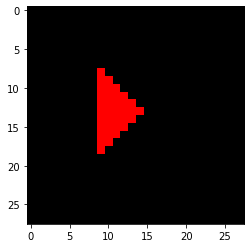

In [96]:
plt.imshow(img_triangle)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


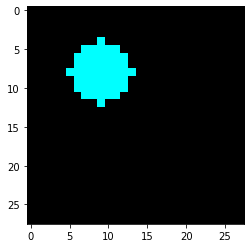

In [97]:
plt.imshow(img_circle)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


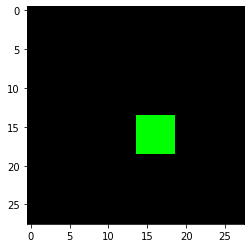

In [98]:
plt.imshow(img_rectangle)   